In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from matplotlib import pyplot as plt

In [2]:
ratings_df = pd.read_csv("data/IMDb ratings.csv")

In [3]:
numeric_values = set(ratings_df.describe().columns)
numeric_values.remove("median_vote")

In [4]:
numeric_values

{'allgenders_0age_avg_vote',
 'allgenders_0age_votes',
 'allgenders_18age_avg_vote',
 'allgenders_18age_votes',
 'allgenders_30age_avg_vote',
 'allgenders_30age_votes',
 'allgenders_45age_avg_vote',
 'allgenders_45age_votes',
 'females_0age_avg_vote',
 'females_0age_votes',
 'females_18age_avg_vote',
 'females_18age_votes',
 'females_30age_avg_vote',
 'females_30age_votes',
 'females_45age_avg_vote',
 'females_45age_votes',
 'females_allages_avg_vote',
 'females_allages_votes',
 'males_0age_avg_vote',
 'males_0age_votes',
 'males_18age_avg_vote',
 'males_18age_votes',
 'males_30age_avg_vote',
 'males_30age_votes',
 'males_45age_avg_vote',
 'males_45age_votes',
 'males_allages_avg_vote',
 'males_allages_votes',
 'mean_vote',
 'non_us_voters_rating',
 'non_us_voters_votes',
 'top1000_voters_rating',
 'top1000_voters_votes',
 'total_votes',
 'us_voters_rating',
 'us_voters_votes',
 'votes_1',
 'votes_10',
 'votes_2',
 'votes_3',
 'votes_4',
 'votes_5',
 'votes_6',
 'votes_7',
 'votes_8',


In [5]:
allgenders_avg_votes = [val for val in numeric_values if val.startswith("allgenders") and val.endswith("avg_vote")]
females_avg_votes = [val for val in numeric_values if val.startswith("females") and val.endswith("avg_vote")]
males_avg_votes = [val for val in numeric_values if val.startswith("males") and val.endswith("avg_vote")]
top_100_votes = [val for val in numeric_values if val.startswith("top1000")]

In [6]:
ratings_df.imdb_title_id.nunique()

85855

In [7]:
import math
from typing import Iterable

def plot_histogram_matrix(df: pd.DataFrame, columns: Iterable[str], cols: int = 3):
    cols = 3
    rows = math.ceil(len(columns) / cols)
    fig, ax = plt.subplots(rows, cols, figsize=(7 * cols, 6 * rows))

    for index, column in enumerate(columns):
        row, col = index // cols, index % cols
        current_ax = ax[row, col] if rows > 1 else ax[col]
        sns.distplot(ax=current_ax, a = df[column].dropna())
        current_ax.set_title(column, fontsize=15)
        current_ax.legend(loc='best')

    plt.show()

/Users/Maxim.Vasilev/Library/Caches/pypoetry/virtualenvs/data-analysis-2021-HxUrdvxH-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/Users/Maxim.Vasilev/Library/Caches/pypoetry/virtualenvs/data-analysis-2021-HxUrdvxH-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/Users/Maxim.Vasilev/Library/Caches/pypoetry

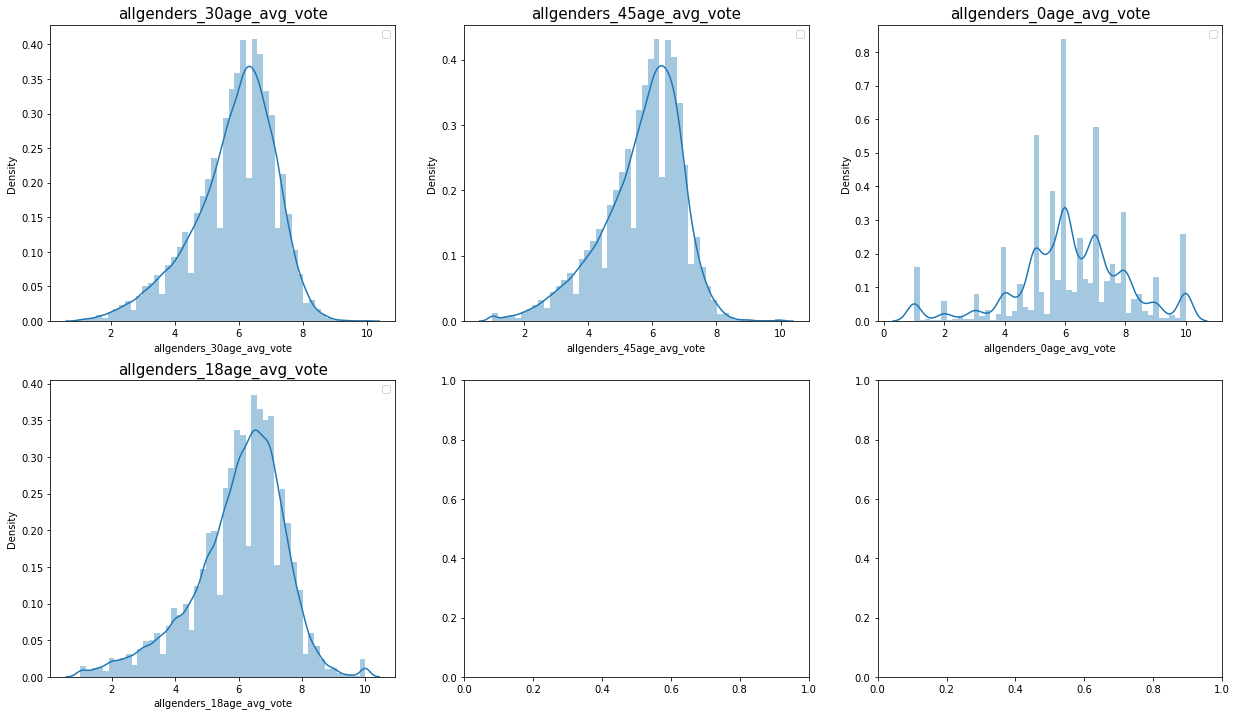

In [8]:
plot_histogram_matrix(ratings_df, allgenders_avg_votes)

/Users/Maxim.Vasilev/Library/Caches/pypoetry/virtualenvs/data-analysis-2021-HxUrdvxH-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/Users/Maxim.Vasilev/Library/Caches/pypoetry/virtualenvs/data-analysis-2021-HxUrdvxH-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/Users/Maxim.Vasilev/Library/Caches/pypoetry

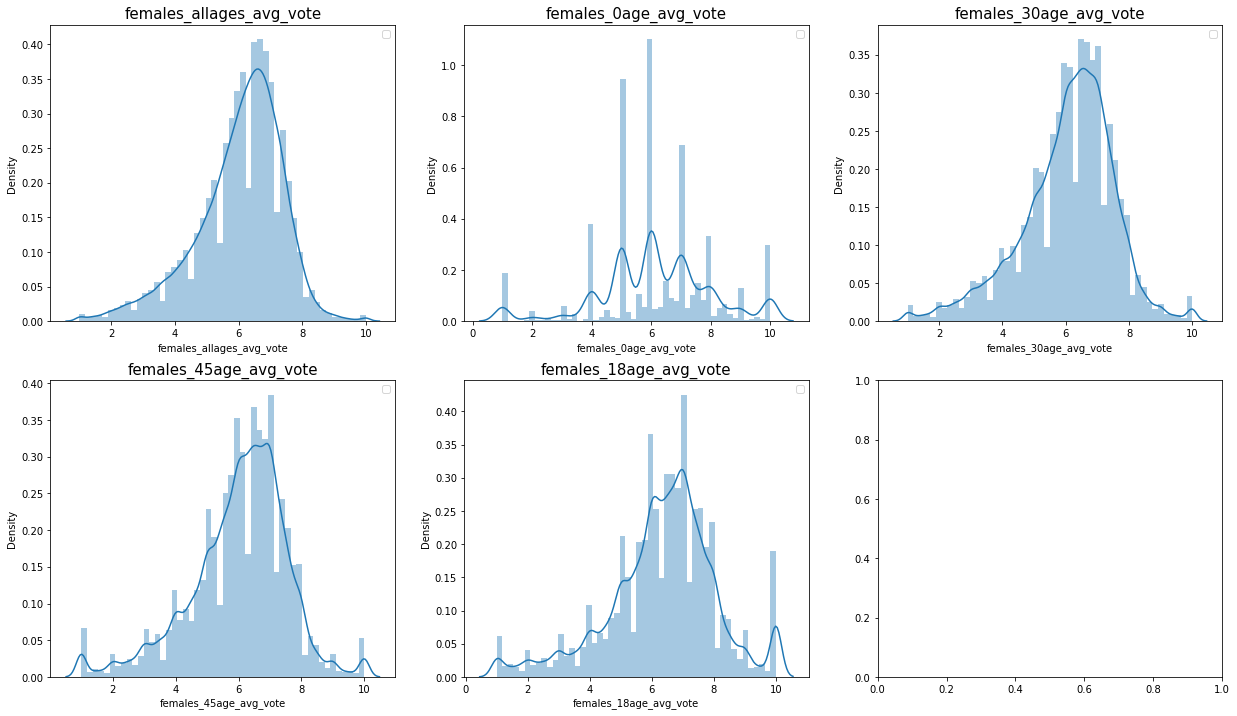

In [9]:
plot_histogram_matrix(ratings_df, females_avg_votes)

/Users/Maxim.Vasilev/Library/Caches/pypoetry/virtualenvs/data-analysis-2021-HxUrdvxH-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/Users/Maxim.Vasilev/Library/Caches/pypoetry/virtualenvs/data-analysis-2021-HxUrdvxH-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/Users/Maxim.Vasilev/Library/Caches/pypoetry

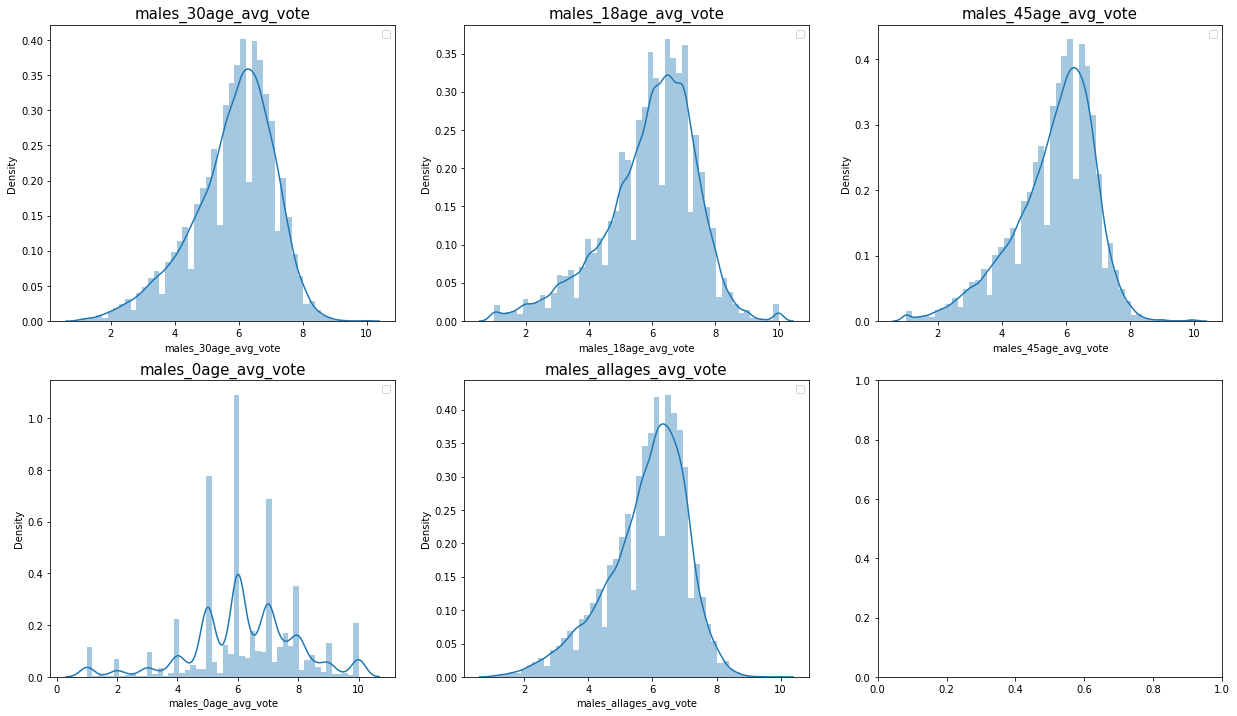

In [10]:
plot_histogram_matrix(ratings_df, males_avg_votes)

/Users/Maxim.Vasilev/Library/Caches/pypoetry/virtualenvs/data-analysis-2021-HxUrdvxH-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/Users/Maxim.Vasilev/Library/Caches/pypoetry/virtualenvs/data-analysis-2021-HxUrdvxH-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


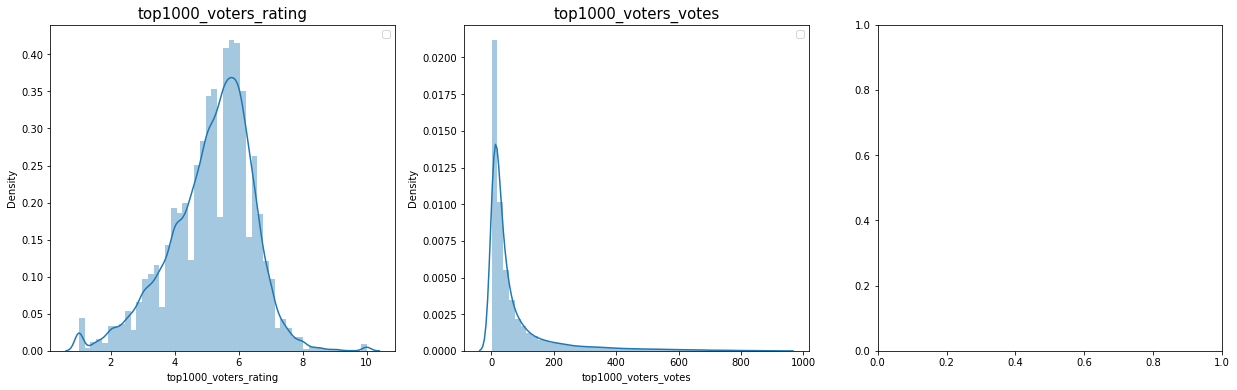

In [11]:
plot_histogram_matrix(ratings_df, top_100_votes)

In [12]:
ratings_df.describe().transpose().drop("count", axis=1)

,mean,std,min,25%,50%,75%,max
weighted_average_vote,5.898656,1.234987,1.0,5.2,6.1,6.8,9.9
total_votes,9493.489605,53574.359543,99.0,205.0,484.0,1766.5,2278845.0
mean_vote,6.226342,1.155280,1.0,5.6,6.4,7.0,9.8
median_vote,6.267853,1.481168,1.0,6.0,6.0,7.0,10.0
votes_10,1216.157941,12455.817087,0.0,21.0,51.0,192.0,1259076.0
votes_9,1196.774608,11735.363316,0.0,8.0,24.0,111.5,629582.0
votes_8,2040.896337,13801.122865,0.0,18.0,49.0,234.0,418070.0
votes_7,2105.668371,10699.375191,0.0,28.0,77.0,342.0,241832.0
votes_6,1353.192802,5976.801303,0.0,30.0,76.0,290.0,145740.0
votes_5,700.291177,2931.301270,0.0,22.0,53.0,178.0,78385.0
